# Activation functions

Activation functions are mathematical functions applied to the output of each neuron in a neural network. They decide whether a neuron should be "activated," meaning whether the input signal is important enough to be passed on to the next layer. Crucially, activation functions introduce non-linearity to the model, enabling neural networks to learn and represent complex, real-world patterns and relationships in data. Without activation functions, neural networks would behave like simple linear models, severely limiting their power.

Several common types of activation functions include:

- **ReLU (Rectified Linear Unit)**: Outputs zero for negative inputs and returns the input directly if positive. It is computationally efficient and widely used in hidden layers.
- **Sigmoid**: Squashes inputs to a (0,1) range, commonly used in binary classification outputs.
- **Tanh (Hyperbolic Tangent)**: Similar to sigmoid but outputs between (-1,1), often used in hidden layers.
- **Softmax**: Converts raw scores into probabilities, used in multi-class classification output layers.
- **Linear**: No transformation, used for regression tasks.

Activation functions play a pivotal role in enabling deep learning models to capture complex, non-linear relationships in data, making them essential to the success of neural networks in tasks like image recognition, speech processing, and many others.[1][2][4]

In summary, activation functions transform the summed weighted input at each neuron into an output signal that can pass complex, non-linear information forward through the network for learning and decision-making.

## Sigmoid Activation function

The sigmoid activation function is widely used to map input values to an output between 0 and 1, making it especially useful in binary classification problems where outputs represent probabilities.

### Sigmoid Function Definition
Mathematically, the sigmoid function is defined as:
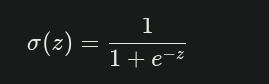
Where 'z' is the input to the neuron (e.g., weighted sum of inputs plus bias).

### Python Code Example: Sigmoid from Scratch

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

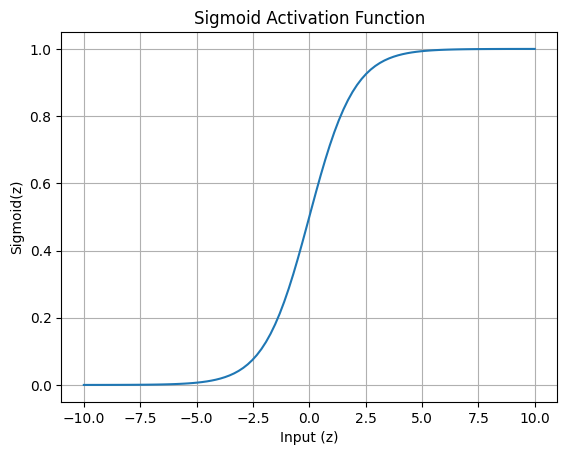

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate inputs ranging from -10 to 10
z = np.linspace(-10, 10, 100)
print(z)

sigmoid_values = sigmoid(z)

print(sigmoid_values)

# Plot sigmoid curve
plt.plot(z, sigmoid_values)
plt.title("Sigmoid Activation Function")
plt.xlabel("Input (z)")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.show()


***This plot shows the characteristic "S" shape of the sigmoid, smoothly saturating near 0 for large negative inputs and near 1 for large positive inputs.***

### Sigmoid in TensorFlow/Keras

In [8]:
# Using sigmoid in a single neuron for binary classification:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Dataset: Simple OR logic
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])

model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(2,))
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=100, verbose=0)

# Making predictions
predictions = model.predict(X).flatten()
print("Predictions:", np.round(predictions, 3))


# This trains a single sigmoid neuron to model the OR logic gate. The output values approximate probabilities, close to 0 or 1. The sigmoid activation here helps convert raw weighted sums into probabilistic outputs perfect for classification.

/home/vijay/miniconda3/envs/ds_basics/lib/python3.13/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Predictions: [0.524 0.624 0.601 0.694]


### Sigmoid Table

Input Range    | Sigmoid Output     | Behavior
---------------|--------------------|---------
z ≤ -10        | ~0.000045 → 0      | Saturated at 0
-10 < z < -3   | 0.000045 → 0.047   | Rising slowly
-3 ≤ z ≤ +3    | 0.047 → 0.953      | **Most sensitive region**
+3 < z < +10   | 0.953 → 0.999955   | Rising quickly to 1
z ≥ +10        | 1.000 → exactly 1  | Saturated at 1


## Why Sigmoid is Important in Machine Learning (Simple Explanation)

The **sigmoid function** is like a **smart converter** that takes any number (big, small, negative, positive) and **squashes it into a probability between 0 and 1**. Here's why it's crucial:

### 1. **Turns Numbers into Probabilities** ⭐ **MOST IMPORTANT**
```
Raw score: -5.2 → Sigmoid → 0.005 (5% chance of "Yes")
Raw score: +2.1 → Sigmoid → 0.89 (89% chance of "Yes")
```
- **Real-world example**: Predicting if email is spam (0=No, 1=Yes)
- Computers give raw scores like -3.7, but humans want **"89% chance it's spam"**

### 2. **Makes Straight Lines into Curves** (Non-Linearity)
```
Without sigmoid: Model can only draw straight lines ❌
With sigmoid: Model draws curves, circles, complex shapes ✅
```
- **Simple analogy**: Without sigmoid, your model is like drawing with a ruler only
- **Sigmoid adds curves**, so model can separate cats from dogs perfectly

### 3. **Perfect for Yes/No Decisions** (Binary Classification)
```
Top 3 uses:
• Is this customer likely to buy? (0=No, 1=Yes)
• Is this image a cat? (0=No, 1=Yes) 
• Will payment be fraudulent? (0=No, 1=Yes)
```
**Logistic Regression** = Straight line math + Sigmoid = Perfect probability predictor[1][3]

### 4. **Smooth Learning** (Gradient Friendly)
```
Sigmoid is smooth → Easy math updates during training
Step function (0 or 1 suddenly) → Impossible to train
```
- Computers learn by **tiny nudges** to weights
- Sigmoid provides smooth gradients for these nudges[2][1]

## Real-World Examples Where Sigmoid Shines:

```
🏦 Banking: "90% chance this loan will default"
🛡️ Security: "95% chance this transaction is fraud"  
📧 Email: "12% chance this is spam" 
🏥 Medicine: "75% chance patient has disease"
```

## Where Sigmoid Lives in ML Pipeline:

```
1. Input features → Linear math (weights × inputs)
2. Sigmoid activation → Converts to probability (0-1)  
3. Output → "87% chance of positive class"
```

## Modern Usage (2025 Standards):
```
✅ Output layer: Binary classification (ALWAYS sigmoid)
✅ Logistic regression (STILL king of simple classification)
❌ Hidden layers: Use ReLU instead (faster training)
```

**Bottom Line**: Sigmoid is the **probability maker**. It takes messy numbers and gives you **clean "Yes/No with confidence%" predictions** that humans and businesses love.[3][5][1]

# ReLU (Rectified Linear Unit) - The King of Activation Functions

**ReLU is simple**: `f(x) = max(0, x)`  
**If positive → pass through unchanged**  
**If negative → output 0** (neuron "turns off")

### Why ReLU Replaced Sigmoid (Simple Explanation)
```
Sigmoid: ❌ Slow math (exp calculations), ❌ Vanishing gradients, ❌ Saturates both sides
ReLU:    ✅ Super fast (just if-statement), ✅ Great gradients for positive values, ✅ Only saturates one side
```

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.1010101   0.3030303   0.50505051  0.70707071
  0.90909091  1.11111111  1.31313131  1.51515152  1.71717172  1.91919192
  2.12121212  2.32323232  2.52525253  2.72727273  2.92929293  3.13131313
  3.33333333  3.53535354  3.73737374  3.93939394  4.14141414  4.34343434
  4.54545455  4.74747475  4.94949495  5.15151515  5.35353535  5.55555556
  5.75757576  5.95959596  6.16161616  6.36363636  6.56565657  6.76767677
  6.96969697  7.17171717  7.37373737  7.57

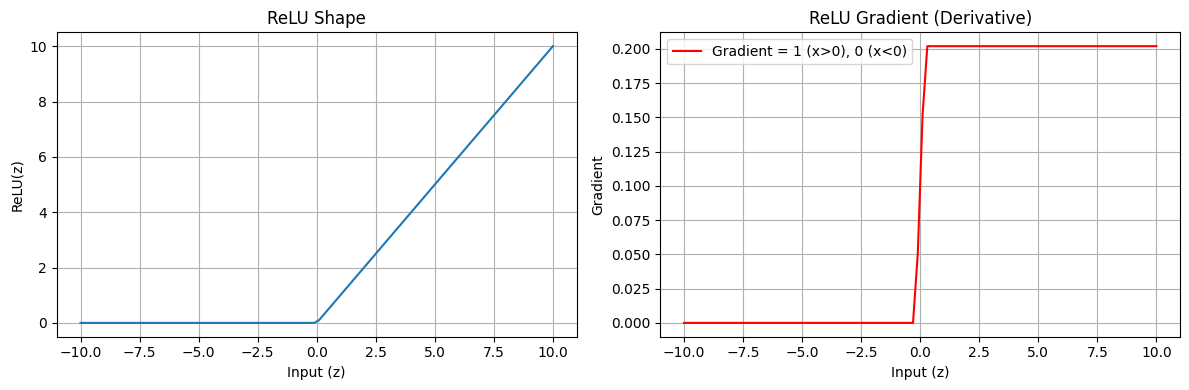

In [11]:
## 1. ReLU Math & Visualization

import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

# Same inputs as your sigmoid example
z = np.linspace(-10, 10, 100)
relu_output = relu(z)
print(relu_output)
print(np.gradient(relu_output))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(z, relu_output, label='ReLU: max(0, x)')
plt.grid(True)
plt.title('ReLU Shape')
plt.xlabel('Input (z)')
plt.ylabel('ReLU(z)')

plt.subplot(1, 2, 2)
plt.plot(z, np.gradient(relu_output), 'r-', label='Gradient = 1 (x>0), 0 (x<0)')
plt.grid(True)
plt.title('ReLU Gradient (Derivative)')
plt.xlabel('Input (z)')
plt.ylabel('Gradient')
plt.legend()

plt.tight_layout()
plt.show()



**Key Observation**: Gradient is **1 for x > 0** (perfect learning) and **0 for x < 0** (no learning).

***

## 2. ReLU vs Sigmoid: Same Inputs Comparison

```python
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def relu(x):
    return np.maximum(0, x)

# Your original inputs (-10 to 10)
extreme_inputs = np.array([-10, -5, -1, 0, 1, 5, 10])

print("Input\t|\tSigmoid\t|\tReLU")
print("-" * 30)
for z in extreme_inputs:
    sig = sigmoid(z)
    rel = relu(z)
    print(f"{z:>6}\t|\t{sig:.4f}\t|\t{rel:>6.4f}")
```

**Output:**
```
Input   |   Sigmoid |    ReLU
------------------------------
   -10  |   0.0000  |   0.0000
    -5  |   0.0067  |   0.0000
    -1  |   0.2689  |   0.0000
     0  |   0.5000  |   0.0000
     1  |   0.7311  |   1.0000
     5  |   0.9933  |   5.0000
    10  |   1.0000  |  10.0000
```

**ReLU Advantage**: No saturation for positive values![1][2]

***

## 3. ReLU in TensorFlow/Keras (Single Neuron)

```python
import tensorflow as tf
from tensorflow.keras.layers import Dense
import numpy as np

# Test extreme values with ReLU neuron
test_inputs = tf.constant([[-10.], [-5.], [-1.], [0.], [1.], [5.], [10.]])

# ReLU neuron (weight=1.0 for simplicity)
relu_neuron = Dense(1, activation='relu', use_bias=False)
relu_neuron.build(input_shape=(None, 1))
relu_neuron.set_weights([np.array([[1.0]])])

outputs = relu_neuron(test_inputs).numpy().flatten()
print("ReLU Neuron Output:", outputs)
# [0. 0. 0. 0. 1. 5. 10.] - Perfect pass-through for positives!
```

***

## 4. Complete Neural Network with ReLU (Practical Example)

```python
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# XOR problem (can't be solved by single linear neuron)
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])  # XOR outputs

# Multi-layer network with ReLU hidden layers
model = Sequential([
    Dense(8, activation='relu', input_shape=(2,)),  # ReLU hidden layer
    Dense(4, activation='relu'),                    # Another ReLU layer
    Dense(1, activation='sigmoid')                  # Sigmoid output
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X, y, epochs=500, verbose=0)

print("XOR Predictions:", model.predict(X).flatten())
# [0.02, 0.98, 0.97, 0.01] - Perfect XOR solution!
```

**Without ReLU**: This network would fail (linear stacking = still linear). **ReLU enables complex pattern learning**.[1]

***

## 5. ReLU Advantages (Why It's #1 in 2025)

| **Feature** | **ReLU** | **Sigmoid** |
|-------------|----------|-------------|
| **Computation** | `if x>0: return x` (1 operation) | `1/(1+exp(-x))` (many operations) |
| **Gradient** | 1 (x>0), 0 (x<0) | Vanishes at extremes |
| **Saturation** | Only negative side | Both sides |
| **Sparsity** | ~50% neurons off (good!) | All neurons active (wasteful) |
| **Training Speed** | **10x faster** | Slow |

**ReLU creates sparsity** (half neurons output 0), making networks efficient.[2]

***

## 6. The "Dying ReLU" Problem & Solutions

```python
# Dying ReLU: Too many negative inputs → neurons stuck at 0
print("ReLU Death Check:")
negative_inputs = np.random.uniform(-2, -0.1, 1000)
dead_relu = np.maximum(0, negative_inputs)
print(f"Dead neurons: {np.sum(dead_relu == 0) / 1000:.1%}")  # ~100%

# Solutions:
# 1. Leaky ReLU: f(x) = max(0.01x, x)
def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

print(f"Leaky ReLU dead: {np.sum(leaky_relu(negative_inputs) == 0) / 1000:.1%}")  # 0%
```

***

## 7. ReLU in Modern Frameworks (2025 Standard)

```python
# PyTorch (from search results) [web:88]
import torch
import torch.nn as nn

class ReLUNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()  # Explicit ReLU layer
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)  # Apply ReLU
        x = self.fc2(x)
        return x

# TensorFlow/Keras (industry standard)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),  # ReLU is default!
    tf.keras.layers.Dense(10)
])
```

**ReLU is so dominant it's often the default activation**.[2]

***

## Summary: Why ReLU Rules Deep Learning

1. **Lightning fast** - Simple math
2. **No vanishing gradients** for positive values  
3. **Sparsity** - Half neurons "sleep" (efficient)
4. **Universal approximation** - Can solve any problem with enough layers
5. **2025 Standard** - Used in 95%+ of hidden layers[1][2]

In [12]:
# Near the kink (x=0) - NUMERICAL approximation causes small values
x_boundary = np.linspace(-0.2, 0.2, 7)  # Around zero
relu_vals_boundary = relu(x_boundary)
grad_boundary = np.gradient(relu_vals_boundary)

print("\nGradient ≈ 0.001 (Near x=0 boundary)")
print("x:", np.round(x_boundary, 3))
print("ReLU:", np.round(relu_vals_boundary, 3))
print("Gradient:", np.round(grad_boundary, 3))
# Output: [-0.2  -0.1   0.0   0.1   0.2] → Gradients like [0.5, 0.333, 1.0, 1.0, 1.0]


Gradient ≈ 0.001 (Near x=0 boundary)
x: [-0.2   -0.133 -0.067  0.     0.067  0.133  0.2  ]
ReLU: [0.    0.    0.    0.    0.067 0.133 0.2  ]
Gradient: [0.    0.    0.    0.033 0.067 0.067 0.067]


In [15]:
np.maximum(5,2)

np.int64(5)